# MSDS 7331 - Case Study 3 - Clasification of e-mail as ham or spam
Daniel Crouthamel

Sophia Wu

Fabio Savorgnan

Bo Yun

# Introduction

In this study, we will be building a classifier to predict busines that will go on bankrupcy. 

# Business Understanding

You should always state the objective at the beginning of every case (a guideline you should follow in real life as well) and provide some initial "Business Understanding" statements (i.e., what is trying to be solved for and why might it be important)

In [1]:
#importing libraries and reading in file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from scipy.stats import randint as sp_randint

#general sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

#Pipeline
from sklearn.pipeline import make_pipeline

# Files
from os import listdir, getcwd, chdir
from os.path import isfile, join, dirname, realpath
from scipy.io import arff



# Data engeniering

Summarize the data being used in the case using appropriate mediums (charts, graphs, tables); address questions such as: Are there missing values? Which variables are needed (which ones are not)? What assumptions or conclusions are you drawing that need to be relayed to your audience?

## Load the data and EDA

In [2]:
files = ['data/1year.arff', 'data/2year.arff', 'data/3year.arff', 'data/4year.arff', 'data/5year.arff']


df = pd.DataFrame(arff.loadarff(files[0])[0])

for f in files[1:]:
    data_temp = arff.loadarff(f)
    df_temp = pd.DataFrame(data_temp[0])
    print(df_temp.shape)
    df = df.merge(df_temp,how='outer') 

(10173, 65)
(10503, 65)
(9792, 65)
(5910, 65)


In [3]:
print(df.shape)

df.head()

(43405, 65)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [5]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,7.672188e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,7.005310e+04,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,2.755425e+01,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,1.088350e+03,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,4.993325e+03,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,6.123700e+06,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000


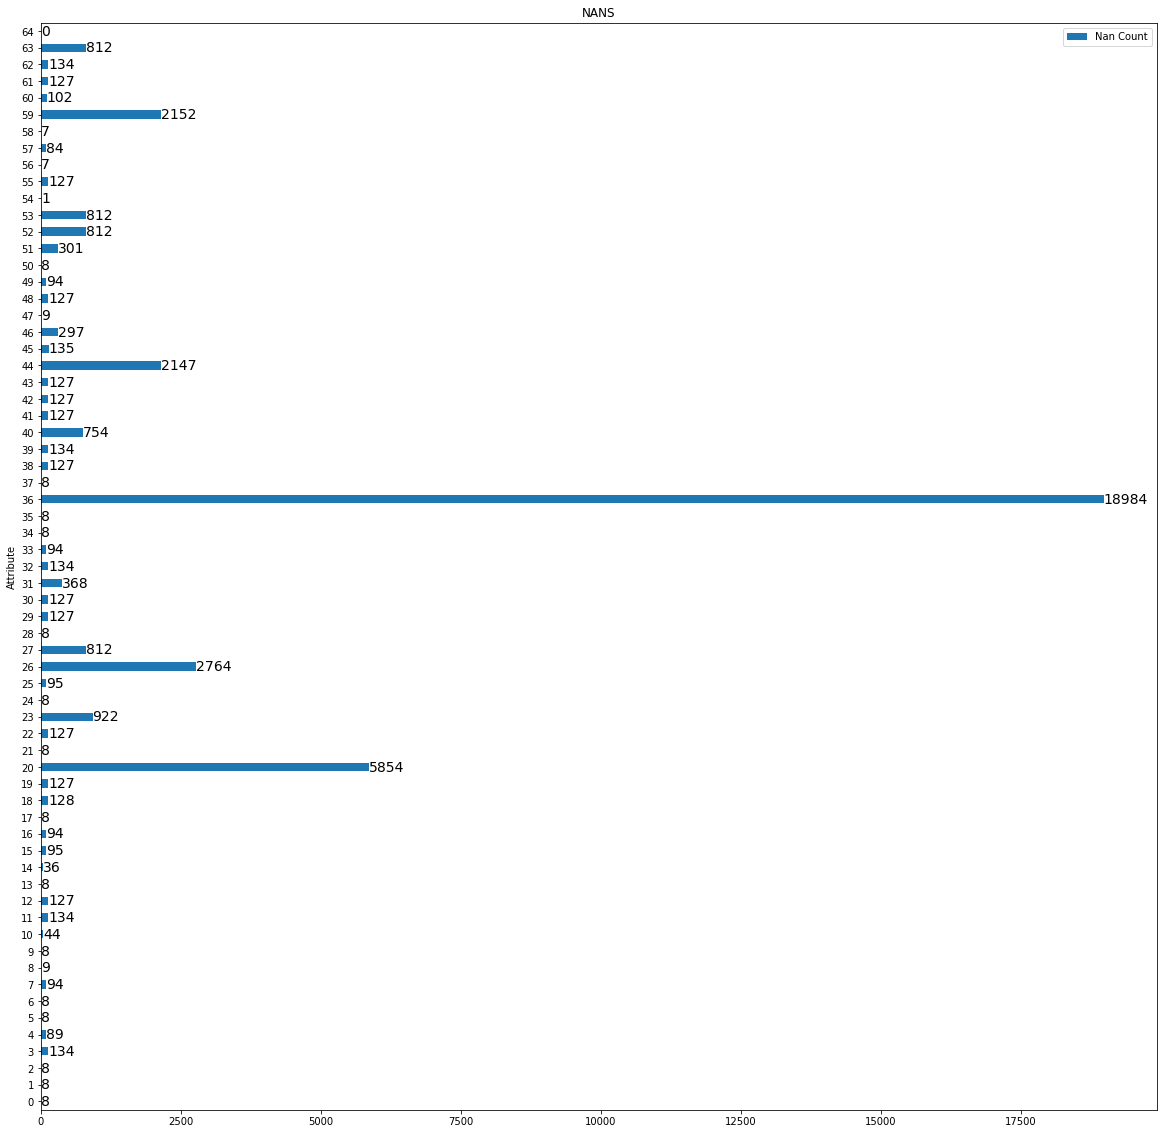

In [10]:
# Checking missing values 
nan_columns = []
nan_values = []

for column in df.columns:
    nan_columns.append(column)
    nan_values.append(df[column].isnull().sum())
    
nan_dict = {'Attributes': nan_columns, "Nan Count": nan_values}
nan_df = pd.DataFrame(nan_dict)

ax = nan_df.plot(kind='barh', stacked=True, figsize=(20, 20), rot=0, xlabel='Attribute', ylabel='Count', title = 'NANS')
for c in ax.containers:
    ax.bar_label(c, label_type='edge', fontsize = 14)

In [11]:
# Now fill all missing values with the mean of the column 
df = df.where(pd.notna(df), df.interpolate(), axis="columns")

In [12]:
# After filling th missing values, check it again.
missing = df.isnull().any(axis=1).sum()
len_before = df.shape[0]
print(f"Total records missing data: {missing}\n"
      f"Total percent of incomplete records: {missing/len_before*100:.2f}%"
     )

Total records missing data: 0
Total percent of incomplete records: 0.00%


## Evaluate and transform to binary 0 0r 1 the target

In [15]:
df["class"].unique


<bound method Series.unique of 0        b'0'
1        b'0'
2        b'0'
3        b'0'
4        b'0'
         ... 
43400    b'1'
43401    b'1'
43402    b'1'
43403    b'1'
43404    b'1'
Name: class, Length: 43405, dtype: object>

In [16]:
# This show that the target is very inbalanced
df['class'].value_counts(normalize=False)

b'0'    41314
b'1'     2091
Name: class, dtype: int64

(array([41314.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2091.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

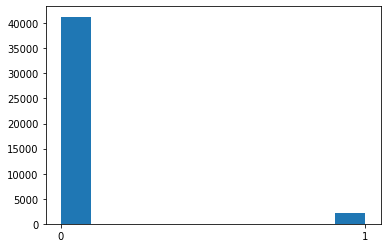

In [6]:
# Plot to better show the inbalanced target
plt.hist(df['class'])

In [7]:
# Convert the target in 0 an1

classes = []

for index, row in df.iterrows():
    class_val = row['class']
    if class_val not in classes:
        classes.append(class_val)

class_dict = {}

for index, i in enumerate(classes):
    class_dict.update({i:str(index)})
    
df['class'] = df['class'].map(class_dict)

df['class'].unique()

array(['0', '1'], dtype=object)

CPU times: user 1 s, sys: 40.3 ms, total: 1.04 s
Wall time: 1.05 s


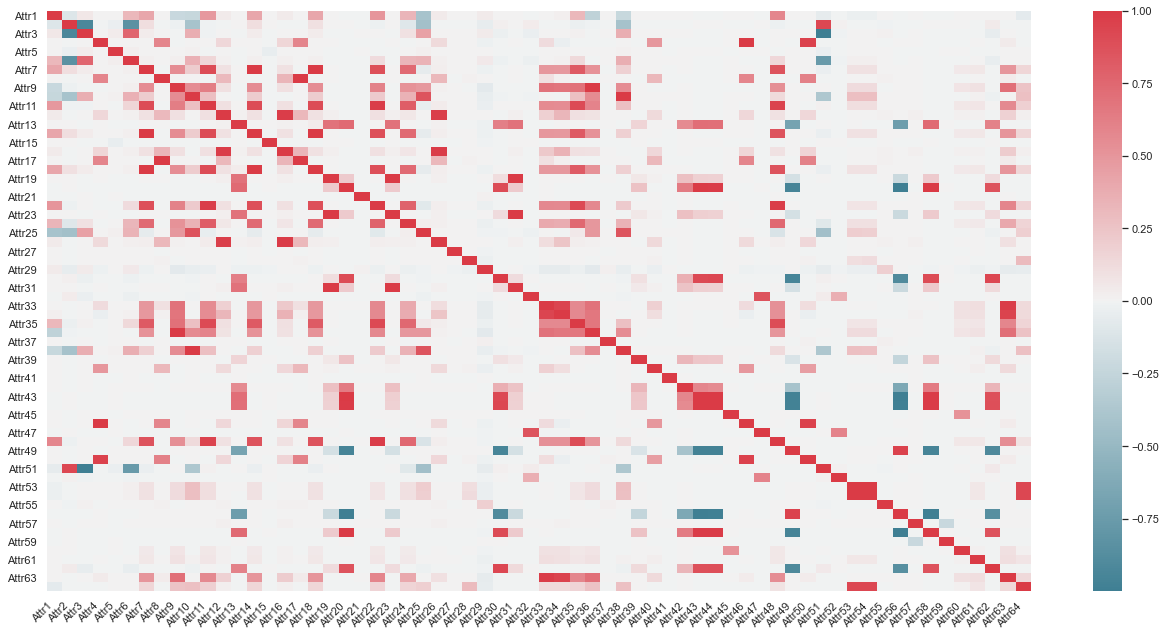

In [17]:
%%time
#Check all correlations
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# show the heatmap
sns.set(style="darkgrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(18, 9))
chart=sns.heatmap(df.corr(), cmap=cmap, annot=False)
chart.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
f.tight_layout()

In [19]:
#List all the top correlations
sort_corr = pd.DataFrame(abs(df.corr().unstack().sort_values().drop_duplicates()))
sort_corr.rename(columns={0:'Top Abs Corr'}, inplace=True)
sort_corr.head(15)

Top Abs Corr
Attr56 Attr20      0.999880
Attr3  Attr51      0.998219
Attr58 Attr56      0.998218
Attr43 Attr56      0.992552
Attr56 Attr44      0.986657
Attr44 Attr49      0.975099
Attr43 Attr49      0.973587
Attr20 Attr49      0.959395
Attr49 Attr58      0.956980
       Attr30      0.948070
Attr3  Attr2       0.926983
Attr49 Attr62      0.908063
Attr30 Attr56      0.903158
Attr62 Attr56      0.864130
Attr2  Attr6       0.842916

In [8]:
# Dataframe
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


## Explore the differents columns of the data with pandas profiling

In [9]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True)
profile.to_file(output_file="output.html")

ModuleNotFoundError: No module named 'pandas_profiling'

We decided that missing values less than 10 % we bould keep as variables for our model because we would impute with the meam for the missing values. We will use the simple imputer.

So we decided to take out the Attr 21  "Sales (n) / sales (n-1)" because it has 13.5 missing values, also we decide to take out Attr 37 "Profit on operating activities / financial expenses" because it has 43.7 missing values. We believe specially for Attr 37 that this amount of missing values would not be able to replace in a meaninfull way with imputation.

We also plan to normalize the data using the rubost scaler.

Please see the attached pandas profiles.
  


(array([3.7541e+04, 4.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-1325. ,  1798.2,  4921.4,  8044.6, 11167.8, 14291. , 17414.2,
        20537.4, 23660.6, 26783.8, 29907. ]),
 <BarContainer object of 10 artists>)

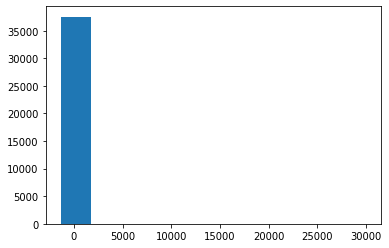

In [10]:
# Sales (n) / sales (n-1)
plt.hist(df["Attr21"])

(array([2.4411e+04, 5.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  -525.52 ,  39419.032,  79363.584, 119308.136, 159252.688,
        199197.24 , 239141.792, 279086.344, 319030.896, 358975.448,
        398920.   ]),
 <BarContainer object of 10 artists>)

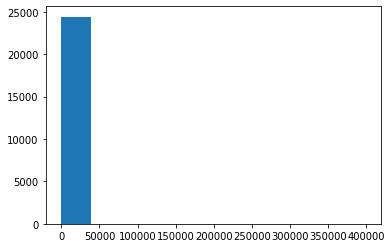

In [11]:
# Profit on operating activities / financial expenses
plt.hist(df["Attr37"])

In [12]:
# Final dataframe
df= df.drop(["Attr21"], axis = 1)
df= df.drop(["Attr37"], axis = 1)
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


# Model preparation

Which methods are you proposing to utilize to solve the problem?  Why is this method appropriate given the business objective? How will you determine if your approach is useful (or how will you differentiate which approach is more useful than another)?  More specifically, what evaluation metrics are most useful given that the problem is a binary-classification one (ex., Accuracy, F1-score, Precision, Recall, AUC, etc.)?

## Randon Forest

In [13]:
# prepare test and train data

X = df.loc[:, df.columns != 'class'].values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [14]:
# Impute

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)

# Normalize the data
transformer = RobustScaler().fit(X_train)
transformer = RobustScaler().fit(X_test)
X_train = transformer.transform(X_train)
X_test= transformer.transform(X_test)

# Model building and Evaluation

In this case, your primary task is to build both a Random Forest and XGBoost model to accurately predict bankruptcy and will involve the following steps:

- Specify your sampling methodology
- Setup your models - highlighting any important parameters
- Analyze each model's performance - referencing your chosen evaluation metric (including supplemental visuals and analysis where appropriate)

## Set up the Grid Search for Random Forest

In [15]:
# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)


RandomizedSearchCV took 131.32 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.968 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 9}

Model with rank: 2
Mean validation score: 0.964 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_split': 2}

Model with rank: 3
Mean validation score: 0.962 (std: 0.002)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_split': 3}

GridSearchCV took 572.91 seconds for 72 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.969 (std: 0.001)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.969 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': Non

## Evaluation of the model

In [16]:
y_hat_rf_train = grid_search.predict(X_train)
accuracy_score(y_hat_rf_train, y_train)

0.9998968398610777

In [17]:
# Confusion matrix train
confusion_matrix(y_train, y_hat_rf_train)

array([[27711,     0],
       [    3,  1367]])

In [18]:
y_hat_rf_test = grid_search.predict(X_test)
accuracy_score(y_hat_rf_test, y_test)

0.9672577492320581

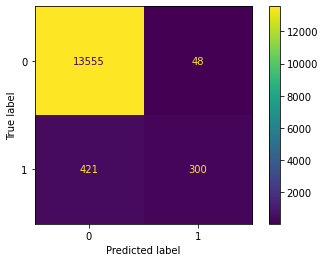

In [19]:
# Confusion matrix test
confusion_matrix(y_test, y_hat_rf_test)
disp = ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test)

In [20]:
# Precision and recall
print("Recall:", recall_score(y_test, y_hat_rf_test, pos_label="1", average='binary'))
print("Precision:", precision_score(y_test, y_hat_rf_test, pos_label="1", average='binary'))

Recall: 0.4160887656033287
Precision: 0.8620689655172413


## Plot evaluation

/Users/sophiawu/opt/anaconda3/envs/ML7331/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Precision-Recall Curve')

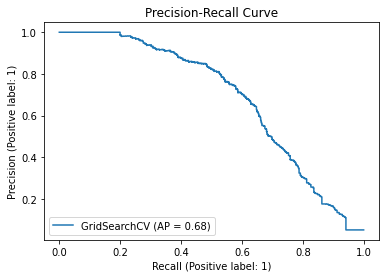

In [21]:
disp = plot_precision_recall_curve(grid_search, X_test, y_test,)
disp.ax_.set_title('Precision-Recall Curve')

## ROC

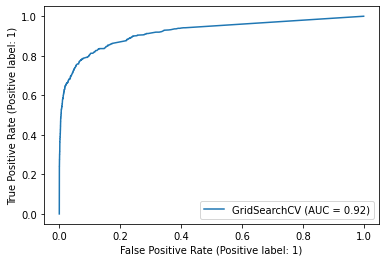

In [22]:
Disp = RocCurveDisplay.from_estimator(grid_search, X_test, y_test)

## GBoost model

In [23]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate= 0.1,
    max_depth=10, random_state=0).fit(X_train, y_train)

## Evaluation of the model for comparison to random forest, in order to see if we can improve the Random forest best model

In [24]:
clf.score(X_train, y_train)

1.0

In [25]:
clf.score(X_test, y_test)

0.9720748394303267

In [26]:
clf.feature_importances_

array([0.00338274, 0.00408363, 0.00719277, 0.01434777, 0.07687351,
       0.01513886, 0.0014729 , 0.00204911, 0.01970434, 0.00311262,
       0.00430253, 0.00275583, 0.00697153, 0.00163451, 0.00753192,
       0.01176732, 0.00298242, 0.00130664, 0.01684912, 0.00915844,
       0.00868015, 0.0026787 , 0.01963419, 0.01318094, 0.01720419,
       0.0607643 , 0.00380925, 0.01224736, 0.00928163, 0.00361718,
       0.00830058, 0.0065207 , 0.1884021 , 0.01329476, 0.00612435,
       0.00712094, 0.0178849 , 0.02072994, 0.00976115, 0.00840103,
       0.00759141, 0.03507556, 0.00711413, 0.04830225, 0.01388091,
       0.0116442 , 0.00728095, 0.00736592, 0.00357958, 0.00566391,
       0.00327336, 0.00707499, 0.01208388, 0.08066922, 0.00805318,
       0.02831713, 0.00451134, 0.01516966, 0.02524388, 0.00365963,
       0.00578885, 0.00839919])

In [27]:
y_hat_G = clf.predict(X_test)

In [28]:
# Precision and recall
print("Recall:", recall_score(y_test, y_hat_G, pos_label="1", average='binary'))
print("Precision:", precision_score(y_test, y_hat_G, pos_label="1", average='binary'))

Recall: 0.5145631067961165
Precision: 0.8812351543942993


## Plot precision and recall

/Users/sophiawu/opt/anaconda3/envs/ML7331/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Precision-Recall Curve')

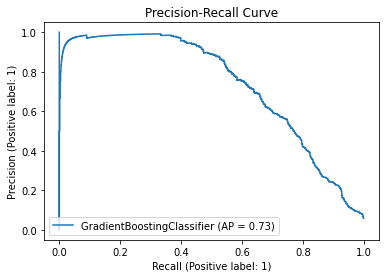

In [29]:
disp = plot_precision_recall_curve(clf, X_test, y_test,)
disp.ax_.set_title('Precision-Recall Curve')

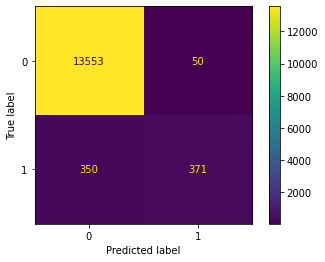

In [30]:
# Confusion matrix
confusion_matrix(y_test, y_hat_G)
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

## ROC 

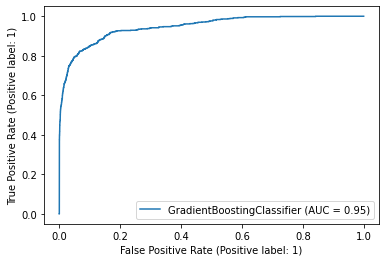

In [31]:
isp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

## Try the grid search for GBoost in order to see if there is any improvement

In [32]:
param_test1 = {'n_estimators':range(100, 500, 1000),
'max_depth':range(10,16), 'min_samples_split':range(1, 10)
}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,min_samples_leaf= 1,random_state= 0), 
param_grid = param_test1,n_jobs=4).fit(X_train, y_train)
gsearch1.score(X_test, y_test)

KeyboardInterrupt: 

In [105]:
y_hat_GG = gsearch1.predict(X_test)
# Precision and recall
print("Recall:", recall_score(y_test, y_hat_GG, pos_label="1", average='binary'))
print("Precision:", precision_score(y_test, y_hat_GG, pos_label="1", average='binary'))

Recall: 0.5173370319001387
Precision: 0.8797169811320755


# Model Interpretability & Explainability

Using at least one of your models above (if multiple were trained):

- Which variable(s) was (were) "most important" and why?  How did you come to the conclusion and how should your audience interpret this?

# Conclusion

After all of your technical analysis and modeling; what are you proposing to your audience and why?  How should they view your results and what should they consider when moving forward?  Are there other approaches you'd recommend exploring?  This is where you "bring it all home" in language they understand.